# Netflix Case: Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
df=pd.read_csv('netflix.csv')
df.head(3)

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 23.6MB/s]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Dataset contains 8807 records and 12 features for movies and TV shows released between 1925 to 2021


In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Data Preprocessing

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are null values in 5 columns namely - director, cast, country, date_added, rating

In [7]:
df['director']=df['director'].fillna('NoDataAvailable')
df['country']=df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Since we are not working with text data here , we will drop the 'description' column
df.drop('description',axis=1,inplace=True)

In [9]:
# We dont need show_id so dropping it
df.drop('show_id',axis=1,inplace=True)

In [10]:
#converting date_added to datetime and extracting info from it
df['date_added']=pd.to_datetime(df['date_added'])
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['month_name']=df['date_added'].dt.month_name()
df['day_name']=df['date_added'].dt.day_name()
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,month_name,day_name
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,September,Saturday
1,TV Show,Blood & Water,NoDataAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,9,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,September,Friday


In [11]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Some of the rating columns have duration values so drop these 3 rows

In [12]:
df[df['rating'].str.contains('min')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,month_name,day_name
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,1 Season,Movies,2017,4,April,Tuesday
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,1 Season,Movies,2016,9,September,Friday
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,1 Season,Movies,2016,8,August,Monday


In [13]:
df.drop(5541, axis=0,inplace=True) 
df.drop(5794, axis=0,inplace=True) 
df.drop(5813, axis=0,inplace=True) 

In [14]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [15]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)
df['ratings_ages']

0            Teens
1           Adults
2           Adults
3           Adults
4           Adults
           ...    
8802        Adults
8803    Older Kids
8804        Adults
8805    Older Kids
8806         Teens
Name: ratings_ages, Length: 8804, dtype: object

In [16]:
df['duration']=df['duration'].apply(lambda x: str(x).split(' ')[0])
df['duration']

0        90
1         2
2         1
3         1
4         2
       ... 
8802    158
8803      2
8804     88
8805     88
8806    111
Name: duration, Length: 8804, dtype: object

In [17]:
# duplicate values
df.duplicated().sum()

0

In [18]:
df.head(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year,month,month_name,day_name,ratings_ages
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NoDataAvailable,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,9,September,Saturday,Teens
1,TV Show,Blood & Water,NoDataAvailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,9,September,Friday,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,9,September,Friday,Adults
3,TV Show,Jailbirds New Orleans,NoDataAvailable,NoDataAvailable,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV",2021,9,September,Friday,Adults
4,TV Show,Kota Factory,NoDataAvailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021,9,September,Friday,Adults
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",2021,9,September,Friday,Adults
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,2021,9,September,Friday,Older Kids
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",2021,9,September,Friday,Adults
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",2021,9,September,Friday,Teens
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",2021,9,September,Friday,Teens


Unnesting the columns of 

- cast
-director
-country
-listed_in

In [19]:
# unnesting 'cast' columnn to make a new dataframe of indiviadual cast, indexed by title
constraint=df['cast'].apply(lambda x:str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','cast']
filtered_cast = pd.DataFrame()
filtered_cast=df_new
filtered_cast.head(5)

,title,cast
0,Dick Johnson Is Dead,NoDataAvailable
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [20]:
# unnesting 'director' columnn to make a new dataframe of individual director, indexed by title
constraint=df['director'].apply(lambda x:str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','director']
filtered_director = pd.DataFrame()
filtered_director=df_new
filtered_director.head(5)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NoDataAvailable
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NoDataAvailable
4,Kota Factory,NoDataAvailable


In [21]:
# unnesting 'country' columnn to make a new dataframe of individual country, indexed by title
constraint=df['country'].apply(lambda x:str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','country']
filtered_country = pd.DataFrame()
filtered_country=df_new
filtered_country.head(5)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States
3,Jailbirds New Orleans,United States
4,Kota Factory,India


In [22]:
# unnesting 'listed_in' columnn to make a new dataframe of individual country, indexed by title
constraint=df['listed_in'].apply(lambda x:str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','listed_in']
filtered_listed_in = pd.DataFrame()
filtered_listed_in=df_new
filtered_listed_in.head(5)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [23]:
dff=filtered_cast.merge(filtered_director,on='title',how='inner')
dff=dff.merge(filtered_country,on='title',how='inner')
dff=dff.merge(filtered_listed_in,on='title',how='inner')
dff.head(5)

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,NoDataAvailable,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,NoDataAvailable,South Africa,International TV Shows


In [24]:
df_new=df[['type','title','year','month','release_year','ratings_ages','duration']]
df_new.head(5)

,type,title,year,month,release_year,ratings_ages,duration
0,Movie,Dick Johnson Is Dead,2021,9,2020,Teens,90
1,TV Show,Blood & Water,2021,9,2021,Adults,2
2,TV Show,Ganglands,2021,9,2021,Adults,1
3,TV Show,Jailbirds New Orleans,2021,9,2021,Adults,1
4,TV Show,Kota Factory,2021,9,2021,Adults,2


In [25]:
dff=dff.merge(df_new,on='title',how='inner')
dff.head(5)

,title,cast,director,country,listed_in,type,year,month,release_year,ratings_ages,duration
0,Dick Johnson Is Dead,NoDataAvailable,Kirsten Johnson,United States,Documentaries,Movie,2021,9,2020,Teens,90
1,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,International TV Shows,TV Show,2021,9,2021,Adults,2
2,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,TV Dramas,TV Show,2021,9,2021,Adults,2
3,Blood & Water,Ama Qamata,NoDataAvailable,South Africa,TV Mysteries,TV Show,2021,9,2021,Adults,2
4,Blood & Water,Khosi Ngema,NoDataAvailable,South Africa,International TV Shows,TV Show,2021,9,2021,Adults,2


This is our final clean unnested data


# Data Analysis

# Distribution of content type


In [26]:
df['type'].value_counts(normalize=True)

Movie      0.696047
TV Show    0.303953
Name: type, dtype: float64

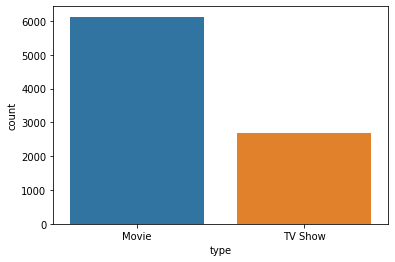

In [27]:
sns.countplot(x='type', data=df)
plt.show()

It is clear that about 69.6% content was Movies and 30.3% content was TV-shows.

---



# Content added over years

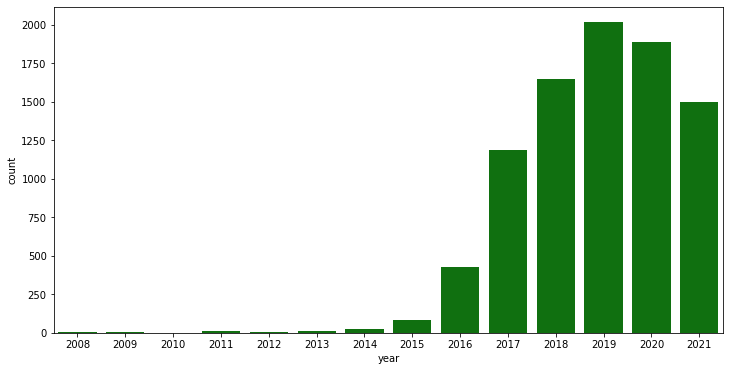

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x='year',data=df,color='green')

Not much content was uploaded on Netflix upto 2014. Number of movies and tv shows began to rise from 2015 and peaked in 2019 and started dipping from 2020 onwards.

In [29]:
content=df.groupby(['type','year'])['release_year'].count().reset_index()
content.head(5)

,type,year,release_year
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3


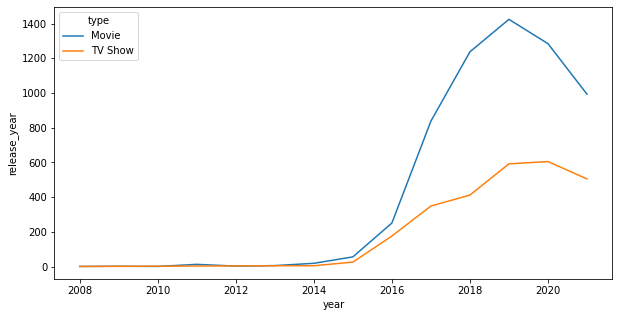

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='release_year',data=content,hue='type')
plt.show()

The above trend shows that not much content was added upto 2014, however between 2015-2019 the content increased and peaked in 2019 after that started to decline again. Most of the content was movies all throughout.

# Countries with highest number of uploads

In [31]:
top10=dff[['country']].value_counts().sort_values(ascending=False).head(10)
top10=top10.to_frame()
top10.reset_index(inplace=True)
top10.columns=['country','num_content']
top10

,country,num_content
0,United States,71243
1,India,22814
2,United Kingdom,12945
3,Japan,8679
4,France,8254
5,Canada,7915
6,Spain,5315
7,South Korea,5043
8,Germany,4383
9,Mexico,3941


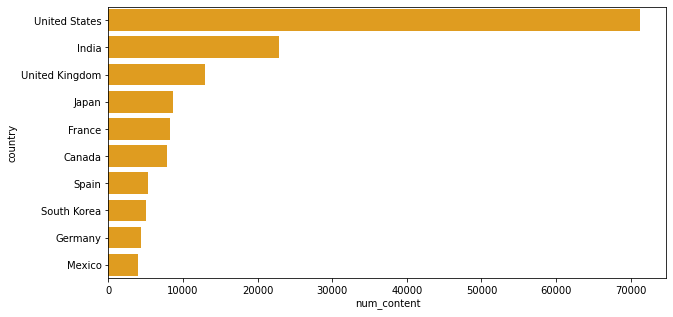

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(y='country',x='num_content',data=top10,color='orange')
plt.show()

Clearly, US uploaded most number of content with India being second and UK being the third.

#Monthly and weekly trend

In [33]:
monthly=df[['month_name','month']].value_counts().reset_index()
monthly.rename(columns={0:"number_contents"}, inplace=True)
monthly=monthly.sort_values('month')
monthly

,month_name,month,number_contents
6,January,1,748
11,February,2,563
7,March,3,742
3,April,4,763
10,May,5,632
8,June,6,728
0,July,7,827
5,August,8,754
2,September,9,769
4,October,10,760


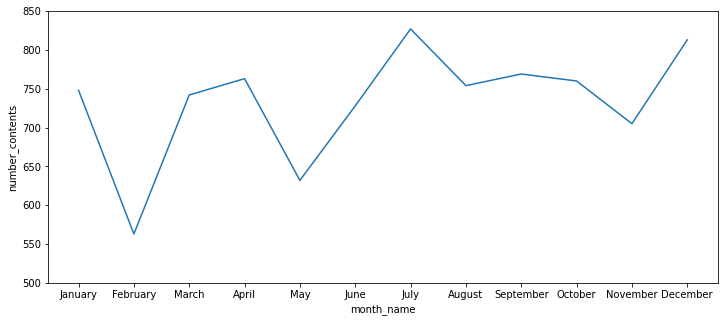

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x='month_name',y='number_contents',data=monthly)
plt.ylim(500,850)
plt.show()

Most of the content was added in second half of the year

In [35]:
weekly=df[['day_name']].value_counts().reset_index()
weekly.rename(columns={0:"number_contents"}, inplace=True)
weekly=weekly.sort_values('day_name')
weekly

,day_name,number_contents
0,Friday,2497
4,Monday,850
5,Saturday,816
6,Sunday,751
1,Thursday,1396
3,Tuesday,1196
2,Wednesday,1298


In [36]:
# ordering weekdays
weekly['day_name']=weekly['day_name'].astype('category')
weekly['day_name']=weekly['day_name'].cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekly

,day_name,number_contents
0,Friday,2497
4,Monday,850
5,Saturday,816
6,Sunday,751
1,Thursday,1396
3,Tuesday,1196
2,Wednesday,1298


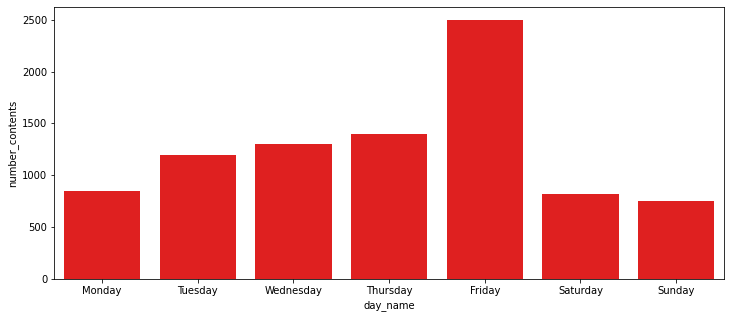

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='day_name',y='number_contents',data=weekly,color='red')
#plt.ylim(500,850)
plt.show()

The number of uploaded content is significantly higher on Friday

# Content Duration

In [38]:
movie=df[['title','type','duration']][df['type']=='Movie']
movie.head(5)

,title,type,duration
0,Dick Johnson Is Dead,Movie,90
6,My Little Pony: A New Generation,Movie,91
7,Sankofa,Movie,125
9,The Starling,Movie,104
12,Je Suis Karl,Movie,127


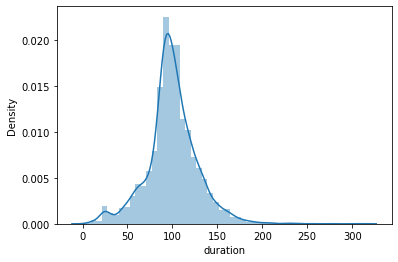

In [39]:
sns.distplot(movie['duration'])
plt.show()

Most of the movies have duration between 70-120 minutes

In [40]:
show=df[['title','type','duration']][df['type']=='TV Show']
show.head(5)

,title,type,duration
1,Blood & Water,TV Show,2
2,Ganglands,TV Show,1
3,Jailbirds New Orleans,TV Show,1
4,Kota Factory,TV Show,2
5,Midnight Mass,TV Show,1


In [41]:
shows=show['duration'].value_counts().reset_index()
shows.rename(columns={'index':'season','duration':'num_content'},inplace=True)
shows.head(5)

,season,num_content
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65


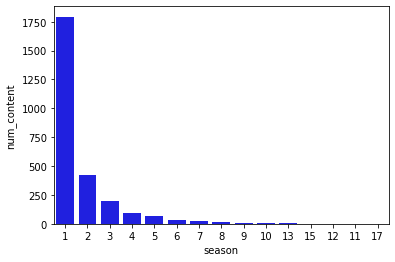

In [42]:
sns.barplot(x='season',y='num_content',data=shows,color='blue')
plt.show()

Most of the TV shows have 1 season.

# Ratings of contents

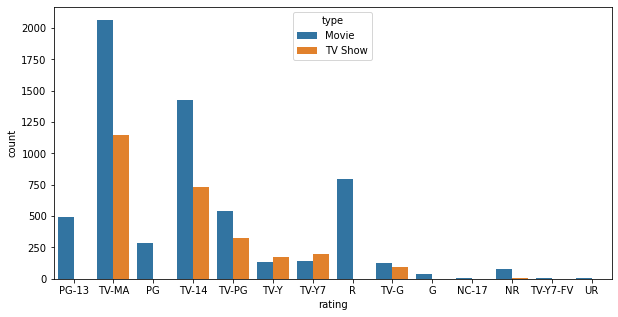

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='rating',hue='type')
plt.show()

Most of the content in both Movies and TV shows is rated TV-MA, more suitable for adults rather than kids. Second highest content is rated for 14 years and above.

In [44]:
ratings=df['ratings_ages'].value_counts().reset_index()
ratings

,index,ratings_ages
0,Adults,4096
1,Teens,2650
2,Older Kids,1490
3,Kids,568


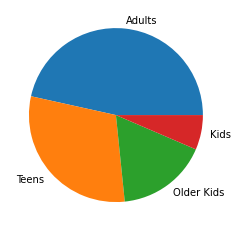

In [45]:
plt.pie(ratings['ratings_ages'],labels=ratings['index'])
plt.show()

# Top Director

In [46]:
director=filtered_director.groupby(['director'])['title'].count().sort_values(ascending=False).reset_index().head(11)
director.rename(columns={'title':'num_content'},inplace=True)
director

,director,num_content
0,NoDataAvailable,2634
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Youssef Chahine,12


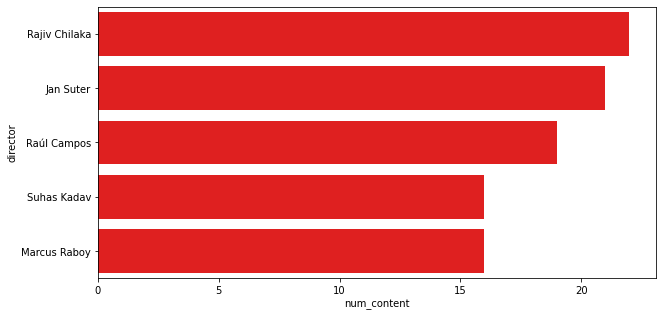

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(y='director',x='num_content',data=director[1:6],color='red')
plt.show()

# Top actor

In [48]:
actor=filtered_cast.groupby(['cast'])['title'].count().sort_values(ascending=False).reset_index().head(11)
actor.rename(columns={'cast':'actor','title':'num_content'},inplace=True)
actor

,actor,num_content
0,NoDataAvailable,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29


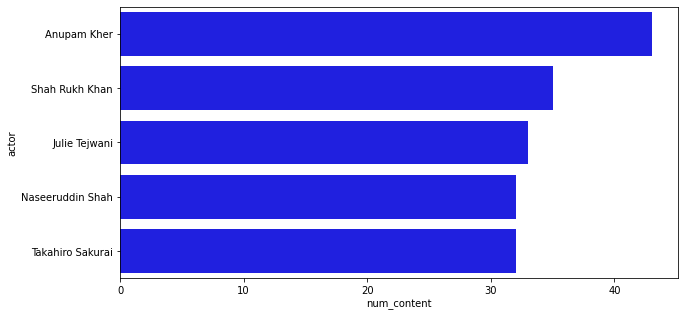

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(y='actor',x='num_content',data=actor[1:6],color='blue')
plt.show()

# Top Genres

In [50]:
len(dff['listed_in'].value_counts().reset_index())

42

42 genres available

In [51]:
genres=dff['listed_in'].value_counts().reset_index().head(10)
genres.rename(columns={'index':'genres','listed_in':'num_content'},inplace=True)
genres

,genres,num_content
0,Dramas,29775
1,International Movies,28211
2,Comedies,20829
3,International TV Shows,12845
4,Action & Adventure,12216
5,Independent Movies,9834
6,Children & Family Movies,9771
7,TV Dramas,8942
8,Thrillers,7107
9,Romantic Movies,6412


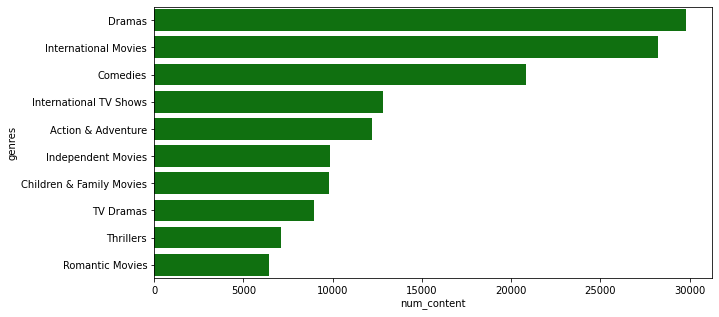

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(y='genres',x='num_content',data=genres,color='green')
plt.show()

Drama was the most preferred genre

#Findings-

- Most of the content released was movies 66% and only 33% were TV shows.

- USA produced most content followed by India.

- Max content was uploaded in 2019.

- Friday is the day of maximum uploaded content.

- Second half of the year sees more content upload.

- 42 genres of movies and shows are available, most popular being Dramas.

- Most movies have duration 70-120 mins.

- Most TV shows have 1 season.

- Most of the content is rated for adults followed by teens and very little for kids.

